In [79]:
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

html = urlopen("https://bit.ly/3jpMFRW")
soup = BeautifulSoup(html, "html.parser")
table = soup.findAll("table", {"class":"wikitable"})[0]
rows = table.findAll("tr")

with open("Dataset.csv", "wt+", newline="") as f:
    writer = csv.writer(f)
    for i in rows:
        row = []
        for cell in i.findAll(["td", "th"]):
            row.append(cell.get_text())
        writer.writerow(row)

data = pd.read_csv("Dataset.csv")
data.head()

,\n,Location\n,Cases\n,Deaths\n
0,\n,World[a]\n,"604,299,313\n","6,494,919\n"
1,\n,European Union[b]\n,"163,622,361\n","1,132,033\n"
2,\n,United States\n,"94,748,404\n","1,047,498\n"
3,\n,India\n,"44,462,445\n","528,007\n"
4,\n,France\n,"34,626,425\n","154,258\n"


In [80]:
data = data.drop("\n", axis=1)
data.columns = ["Country", "Cases", "Deaths"]
data.head()

,Country,Cases,Deaths
0,World[a]\n,"604,299,313\n","6,494,919\n"
1,European Union[b]\n,"163,622,361\n","1,132,033\n"
2,United States\n,"94,748,404\n","1,047,498\n"
3,India\n,"44,462,445\n","528,007\n"
4,France\n,"34,626,425\n","154,258\n"


In [81]:
data.replace('\n', '', regex=True, inplace=True)
data

,Country,Cases,Deaths
0,World[a],"604,299,313","6,494,919"
1,European Union[b],"163,622,361","1,132,033"
2,United States,"94,748,404","1,047,498"
3,India,"44,462,445","528,007"
4,France,"34,626,425","154,258"
...,...,...,...
214,Wallis and Futuna,761,7
215,Vatican City,29,0
216,"Saint Helena, Ascension and Tristan da Cunha",7,—
217,North Korea,1,6


In [82]:
for i in range(2):
    data.Country[i] = data.Country[i][:-3]
data

,Country,Cases,Deaths
0,World,"604,299,313","6,494,919"
1,European Union,"163,622,361","1,132,033"
2,United States,"94,748,404","1,047,498"
3,India,"44,462,445","528,007"
4,France,"34,626,425","154,258"
...,...,...,...
214,Wallis and Futuna,761,7
215,Vatican City,29,0
216,"Saint Helena, Ascension and Tristan da Cunha",7,—
217,North Korea,1,6


In [83]:
import numpy as np
data.Cases = data.Cases.str.replace(',', '').replace(np.nan, 0).astype(int)
data.Deaths = data.Deaths.str.replace(',', '').replace(np.nan, 0).replace('—', 0).astype(int)

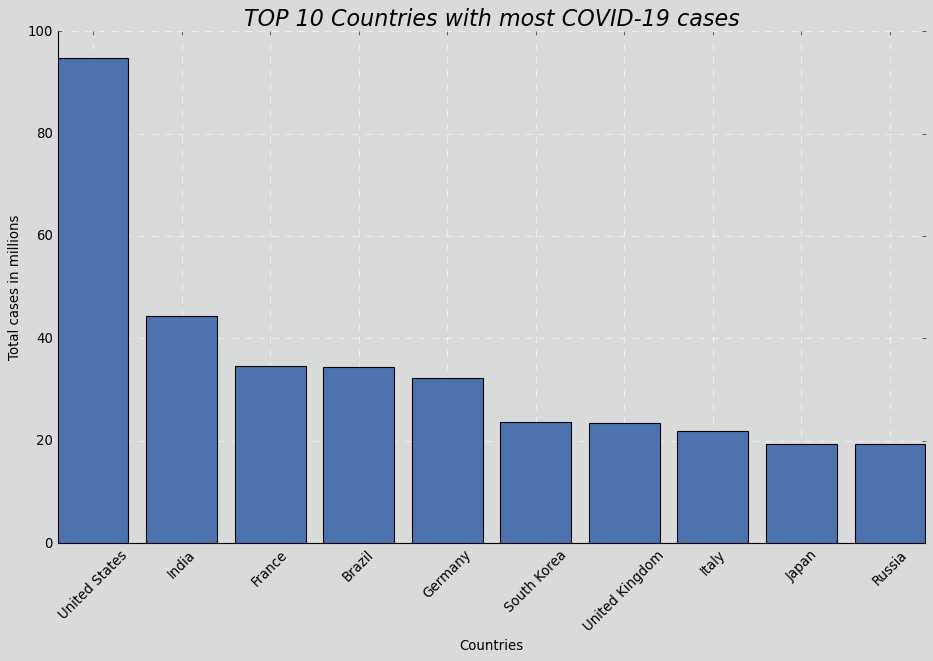

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('classic')
plt.rcParams["figure.facecolor"] = '#d9dbda'
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#d9dbda')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color='white', linestyle='dashed', alpha=0.7, lw=.7, zorder=0)
ax.xaxis.grid(color='white', linestyle='dashed', alpha=0.7, lw=.7, zorder=0)
ax.bar(data.Country[2:12], data.Cases[2:12] / 10**6, color='#4c72b0', zorder=6)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Countries')
plt.ylabel('Total cases in millions')
plt.xticks(rotation = 45)
plt.title('TOP 10 Countries with most COVID-19 cases', size=20, style='italic')
plt.show()

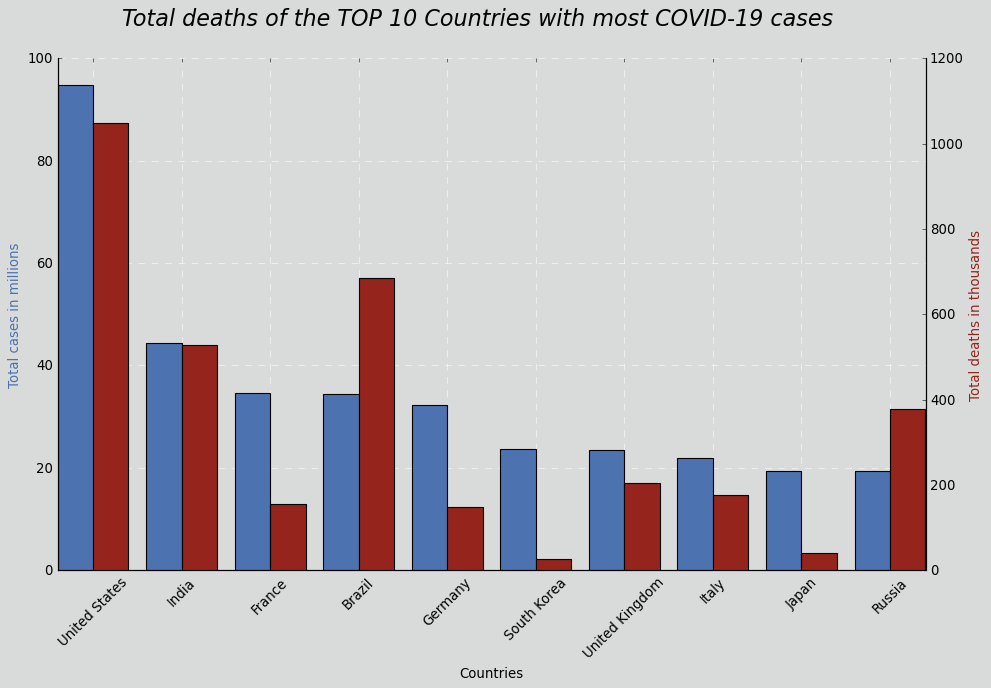

In [99]:
X_axis = np.arange(len(data[2:12].Country))
plt.rcParams["figure.facecolor"] = '#d9dbda'

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_facecolor('#d9dbda')
ax1.spines['top'].set_visible(False)
ax1.yaxis.grid(color='white', linestyle='dashed', alpha=0.7, lw=.7, zorder=0)
ax1.xaxis.grid(color='white', linestyle='dashed', alpha=0.7, lw=.7, zorder=0)
ax1.bar(X_axis - 0.2, data[2:12].Cases/10**6, 0.4, label = 'Cases', color='#4c72b0', zorder=3)
ax1.set_ylabel('Total cases in millions', color='#4c72b0')
plt.xticks(ticks=X_axis, labels=data[2:12].Country, rotation = 45)
plt.xlabel('Countries')
ax2 = ax1.twinx()
ax2.spines['top'].set_visible(False)
ax2.bar(X_axis + 0.2, data[2:12].Deaths/10**3, 0.4, label = 'Deaths',color='#94241c', zorder=3)
ax2.set_ylabel('Total deaths in thousands', color='#94241c')


plt.suptitle('Total deaths of the TOP 10 Countries with most COVID-19 cases', size=20, style='italic')
plt.show()